#Data visualization
##Importing packages

In [0]:
# Importing required packeges
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os,sys

###Link to google drive

Due to huge database size I have changed my notebook runtime type to [Python 3 / GPU] by going to "Runtime" > "Change runtime type". 

In [0]:
#To get access to the files on google drive an authorization code it nessacery which will be given by the linked below
from google.colab import drive
drive.mount('/gdrive')

### Defining input and output paths and reading files

In [3]:
input_data_path="/gdrive/My Drive/Colab Notebooks/Input_files"
output_data_path="/gdrive/My Drive/Colab Notebooks/Output_files"
os.listdir(input_data_path)

['data_InstaCart_sparse_group0.npz',
 'user_vecs.csv',
 'item_vecs.csv',
 'orders.csv',
 'order_products__train.csv',
 'order_products__prior.csv',
 'products.csv',
 'sample_submission.csv',
 'produced',
 'Original',
 '.DS_Store',
 '.ipynb_checkpoints']

In [0]:
df=pd.read_csv(os.path.join(input_data_path+'/produced','data_InstaCart.csv'))


In [5]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,77.0,7.0
1,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,23.0,19.0
2,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,91.0,16.0
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,23.0,19.0
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,54.0,17.0


### Processing data

This file only contains train and prior sets of data. The test set was removed

In [0]:
df.dropna(subset=['product_id'], inplace=True)

#df.to_csv(os.path.join(input_data_path,'data_InstaCart_train.csv'), encoding='utf-8',index=False)

To reduce the size of file, the 'eval_set' column will be removed too. 

In [0]:
df=df.drop(columns=['eval_set'])

We have some NAN values for the first time purchases. In order to  take into account these information we can convert them to a value. I have chosen -1 to a replacement of NAN values in this particular feature. 

In [8]:
df.days_since_prior_order=df.days_since_prior_order.fillna(-1)
#to check
df.days_since_prior_order.isnull().any()

False

In [9]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
0,2539329,1,1,2,8,-1.0,196.0,1.0,0.0,77.0,7.0
1,2539329,1,1,2,8,-1.0,12427.0,3.0,0.0,23.0,19.0
2,2539329,1,1,2,8,-1.0,14084.0,2.0,0.0,91.0,16.0
3,2539329,1,1,2,8,-1.0,26088.0,4.0,0.0,23.0,19.0
4,2539329,1,1,2,8,-1.0,26405.0,5.0,0.0,54.0,17.0


## Defining functions

In [0]:
def bar_most20(data,feature,data_feature,titles_name):
  #this function plot a sorted histogra of 20 most populated items of given feature
  #data: is the main data set like df
  #feature: which feature you would like to work on, string
  #data_feature: is the dataset of that feature, if you are working on products, it would be products dataset which is coming from products.cvs file
  #tick_name:the names that would go to the axis x
  #titles_name: a list of the names and lable of the x axis, the tile of the plot and output saving file name as [x_lable,title, file name]
  dist=pd.DataFrame(data={'count':data.loc[:,feature].value_counts().sort_values(ascending=False)}) \
        .reset_index().rename(columns={"index": feature})\
        .join(data_feature.set_index(feature),on=feature)
  print('\033[1m\033[4mExtrated features:\n\033[0m',dist.head(2))
  #defining the lables of the x axis
  tick_name=[]
  for itr,row in enumerate(dist.iloc[0:20,2]):tick_name.append(row)
  print('\033[1m\033[4m20 most populated items:\n\033[0m',tick_name)
  #fig=plt.figure(figsize=(20,8))
  plt.bar(np.arange(20), dist.loc[0:19,'count'],color='#00C5CD',align='center')
  plt.xticks(np.arange(20), tick_name, rotation=90)
  plt.xlabel(titles_name[0])
  plt.ylabel('Count')
  plt.title(titles_name[1])
  #plt.show()
  #fig.savefig(os.path.join(output_data_path,titles_name[2]))   # save the figure to file
  #plt.close(fig)

##Ploting

### Day of the week

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


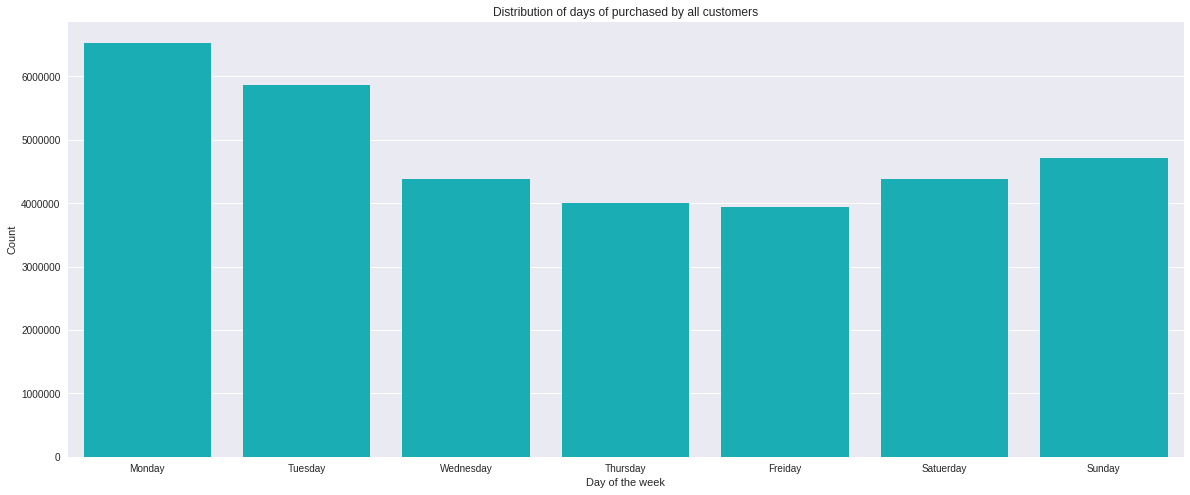

In [11]:
fig=plt.figure(figsize=(20,8))
sns.countplot(x='order_dow',data=df,color='#00C5CD')
tick_name=['Monday','Tuesday','Wednesday',"Thursday",'Freiday','Satuerday','Sunday']
plt.xticks(np.arange(7),tick_name, rotation=0)
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Distribution of days of purchased by all customers')
plt.show()
fig.savefig(os.path.join(output_data_path,'DaysofWeek.png'))   # save the figure to file
plt.close(fig)

### Time

In [12]:
np.sort(df.order_hour_of_day.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


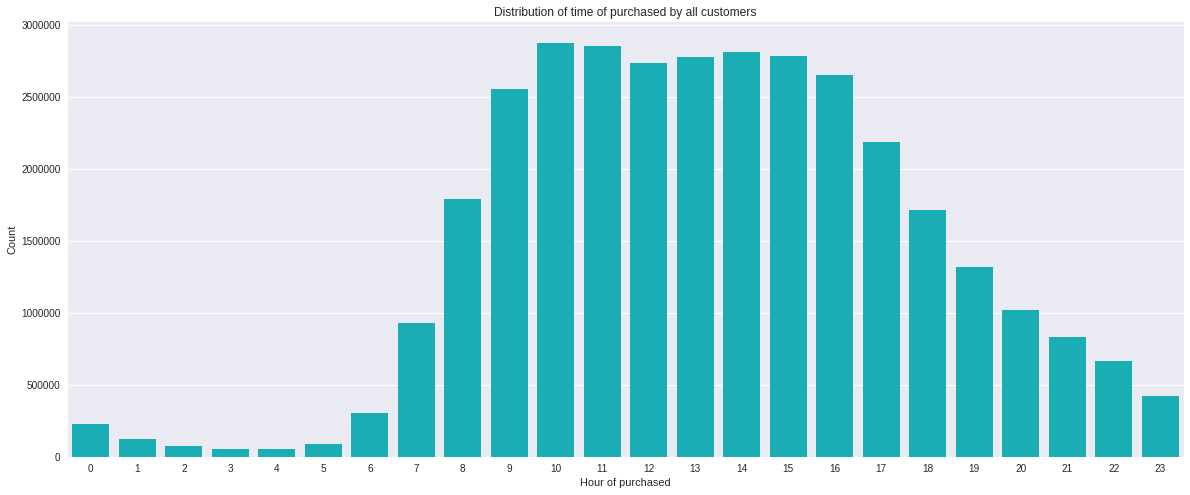

In [13]:
fig=plt.figure(figsize=(20,8))
sns.countplot(x='order_hour_of_day',data=df,color='#00C5CD')
#sns.distplot(df.order_hour_of_day, kde=False,color='#00C5CD')
plt.xlabel('Hour of purchased')
plt.xticks(np.arange(0,24))
plt.ylabel('Count')
plt.title('Distribution of time of purchased by all customers')
plt.show()
fig.savefig(os.path.join(output_data_path,'PurchasedTime.png'))   # save the figure to file
plt.close(fig)

### Days since prior order


In [14]:
np.sort(df.days_since_prior_order.unique())

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
       25., 26., 27., 28., 29., 30.])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


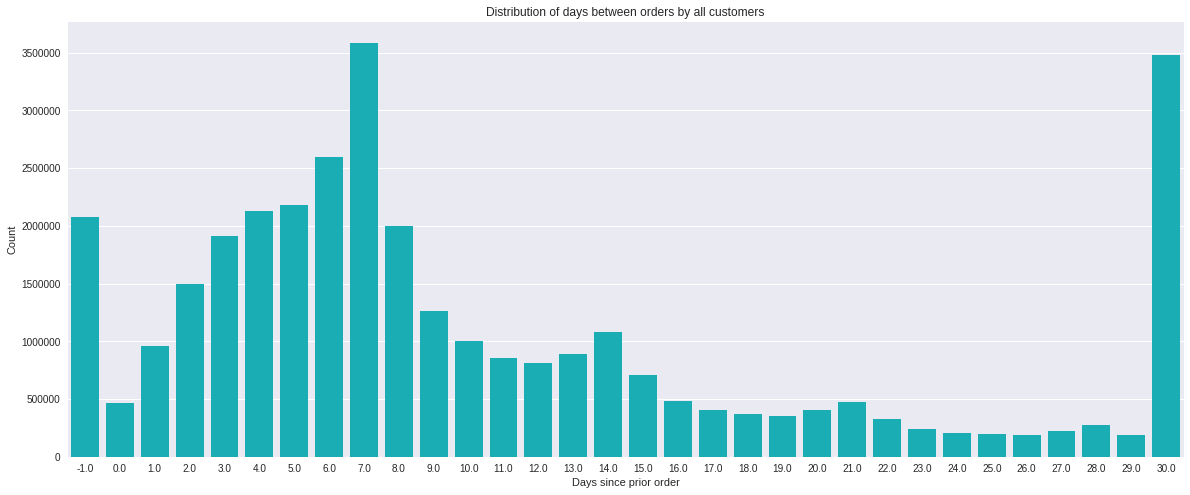

In [15]:

fig=plt.figure(figsize=(20,8))
sns.countplot(x='days_since_prior_order',data=df,color='#00C5CD')
#sns.distplot(df.order_hour_of_day, kde=False,color='#00C5CD')
plt.xlabel('Days since prior order')
plt.xticks(np.arange(df.days_since_prior_order.nunique()))
plt.ylabel('Count')
plt.title('Distribution of days between orders by all customers')
plt.show()
fig.savefig(os.path.join(output_data_path,'DaysSincePriorOrder.png'))   # save the figure to file
plt.close(fig)


The first column bar is related to customers who ordered for  very first time. Of course everybody has to have teir first orders to stat with. This histogram shows that most of customers put their order in weekly basis. This group are followed by customers who order monthly. 

###Products

In [16]:
products=pd.read_csv(os.path.join(input_data_path,'products.csv'))
products.shape

(49688, 4)

In [17]:
df.loc[df.product_id==5,:].reset_index()

,index,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
0,9677497,2643104,58825,6,0,13,6.0,5.0,4.0,0.0,5.0,13.0
1,9677506,2531851,58825,7,2,8,30.0,5.0,12.0,1.0,5.0,13.0
2,16863261,1442556,102105,1,0,12,-1.0,5.0,3.0,0.0,5.0,13.0
3,16863316,1293120,102105,7,5,11,18.0,5.0,5.0,1.0,5.0,13.0
4,25000127,2624555,151922,4,4,5,4.0,5.0,16.0,0.0,5.0,13.0
5,26370474,2622339,160220,7,0,11,7.0,5.0,8.0,0.0,5.0,13.0
6,26370483,287805,160220,8,6,11,6.0,5.0,7.0,1.0,5.0,13.0
7,26370510,557126,160220,10,6,12,5.0,5.0,7.0,1.0,5.0,13.0
8,26370543,3296060,160220,13,3,1,8.0,5.0,6.0,1.0,5.0,13.0
9,26370558,1630036,160220,14,1,12,5.0,5.0,4.0,1.0,5.0,13.0


In [18]:
df.product_id.nunique()

49685

It shows the order list contains 3 less producs, meaning there are 3 products which never purchased by customers.

In [19]:
print(df.product_id.value_counts().max())
np.argmax(df.product_id.value_counts())

491291


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


24852.0

#### The quntity of products ordered by a customer

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


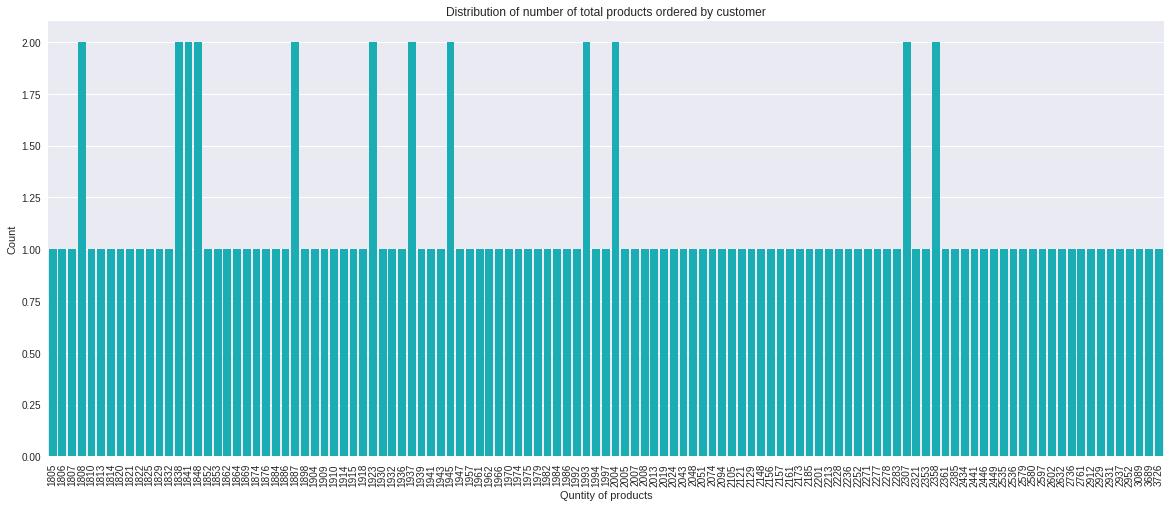

In [67]:
df_=df[['user_id','product_id']]
df_=df_.join(pd.DataFrame({'quantity':df_.groupby('user_id').size()}).reset_index().set_index('user_id'),on=('user_id'))
df_=df_.drop_duplicates('user_id')
df_.head()
fig=plt.figure(figsize=(20,8))
sns.distplot(df_.quantity,color='#00C5CD', kde=False, hist=True, norm_hist=False,bins=int(df_.quantity.max()/10))
plt.xlabel('Quntity of products')
#plt.xlim(0,100)
plt.ylabel('Count')
plt.title('Distribution of number of total products ordered by customer')
plt.show()
fig.savefig(os.path.join(output_data_path,'Quantity_products.png'))   # save the figure to file
plt.close(fig)

fig=plt.figure(figsize=(20,8))
sns.countplot(x='quantity',data=df_[df_.quantity<100],color='#00C5CD')
plt.xlabel('Quntity of products')
plt.ylabel('Count')
plt.title('Distribution of number of total products ordered by customer')
plt.show()
fig.savefig(os.path.join(output_data_path,'Quantity_products_zoom_low.png'))   # save the figure to file
plt.close(fig)

fig=plt.figure(figsize=(20,8))
sns.countplot(x='quantity',data=df_[df_.quantity>1800],color='#00C5CD')
plt.xlabel('Quntity of products')
plt.ylabel('Count')
plt.title('Distribution of number of total products ordered by customer')
plt.xticks(rotation=90)
plt.show()
fig.savefig(os.path.join(output_data_path,'Quantity_products_zoom_high.png'))   # save the figure to file
plt.close(fig)

In [0]:
print(df_.quantity[df_.quantity>1800].value_counts(),'\nThe number of customer with unique quantity number larger than 1800 items:',(df_.quantity[df_.quantity>1800].value_counts()==1).sum())
fig=plt.figure(figsize=(20,8))
sns.countplot(x=df_.quantity.value_counts(),color='#00C5CD')
#sns.distplot(df.order_hour_of_day, kde=False,color='#00C5CD')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.xlim(0,50)
plt.title('Distribution of quantity ordered products')
plt.show()
fig.savefig(os.path.join(output_data_path,'quantitydistribution.png'))   # save the figure to file
plt.close(fig)

#### The histogram of 20 most popular products

Extrated features:
   product_id   count            product_name  aisle_id  department_id
0      24852  491291                  Banana        24              4
1      13176  394930  Bag of Organic Bananas        24              4
20 most populated items:
 ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk', 'Organic Raspberries', 'Organic Yellow Onion', 'Organic Garlic', 'Organic Zucchini', 'Organic Blueberries', 'Cucumber Kirby', 'Organic Fuji Apple', 'Organic Lemon', 'Organic Grape Tomatoes', 'Apple Honeycrisp Organic']


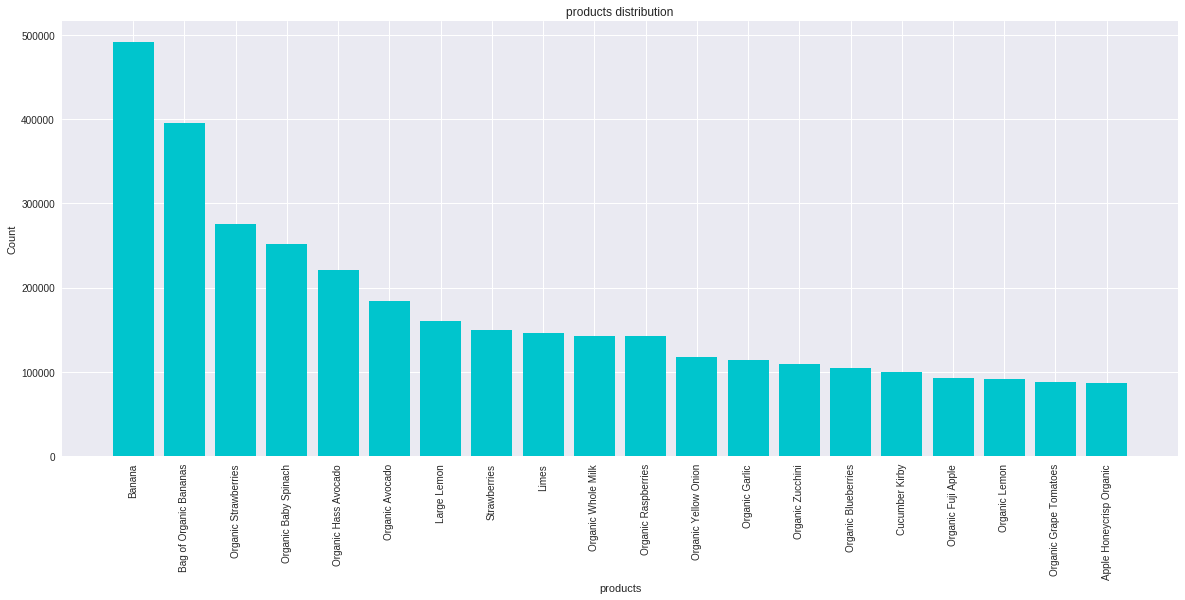

In [76]:
fig=plt.figure(figsize=(20,8))
bar_most20(data=df,
          feature='product_id',
          data_feature=products,
          titles_name=['products','products distribution'])
plt.show()
fig.savefig(os.path.join(output_data_path,'most20products_allcutomers.png'))   # save the figure to file
plt.close(fig)

#### The histogram of 20 most popular products of first days

In [18]:
selection=df.loc[df['days_since_prior_order'].isin([-1,7,30])]
selection.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
0,2539329,1,1,2,8,-1.0,196.0,1.0,0.0,77.0,7.0
1,2539329,1,1,2,8,-1.0,12427.0,3.0,0.0,23.0,19.0
2,2539329,1,1,2,8,-1.0,14084.0,2.0,0.0,91.0,16.0
3,2539329,1,1,2,8,-1.0,26088.0,4.0,0.0,23.0,19.0
4,2539329,1,1,2,8,-1.0,26405.0,5.0,0.0,54.0,17.0


Extrated features:
   product_id  count            product_name  aisle_id  department_id
0      24852  29534                  Banana        24              4
1      13176  19158  Bag of Organic Bananas        24              4
20 most populated items:
 ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Avocado', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Strawberries', 'Limes', 'Large Lemon', 'Organic Whole Milk', 'Organic Blueberries', 'Cucumber Kirby', 'Organic Garlic', 'Organic Raspberries', 'Yellow Onions', 'Organic Yellow Onion', 'Organic Grape Tomatoes', 'Organic Fuji Apple', 'Organic Lemon', 'Honeycrisp Apple']


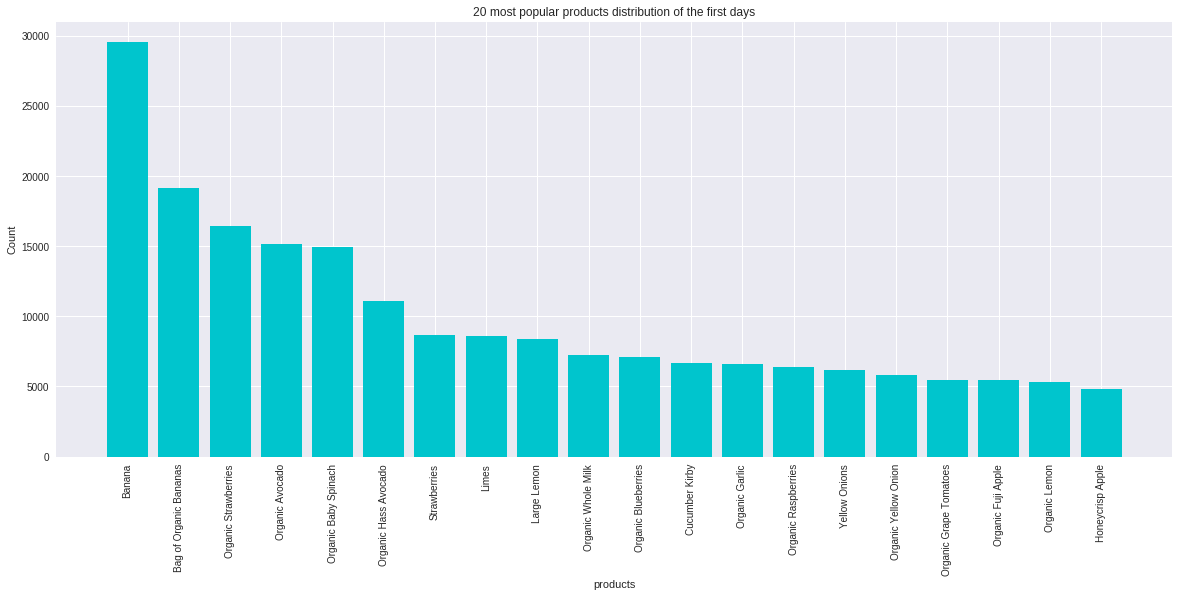

In [19]:
bar_chart(data=selection.loc[df['days_since_prior_order'].isin([-1])],
          feature='product_id',
          data_feature=products,
          titles_name=['products','20 most popular products distribution of the first days','FirstDayProducts.png'])

Extrated features:
   product_id  count            product_name  aisle_id  department_id
0      24852  59420                  Banana        24              4
1      13176  44119  Bag of Organic Bananas        24              4
20 most populated items:
 ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Organic Whole Milk', 'Limes', 'Organic Raspberries', 'Organic Yellow Onion', 'Organic Fuji Apple', 'Organic Zucchini', 'Organic Garlic', 'Organic Blueberries', 'Cucumber Kirby', 'Apple Honeycrisp Organic', 'Seedless Red Grapes', 'Organic Half & Half']


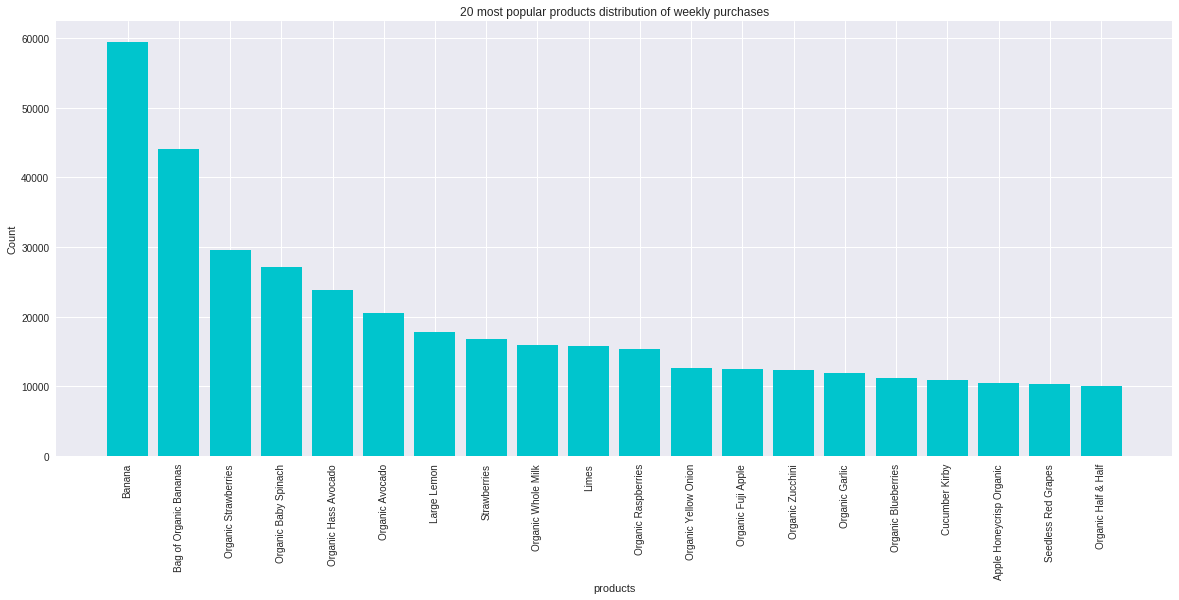

In [20]:
bar_chart(data=selection.loc[df['days_since_prior_order'].isin([7])],
          feature='product_id',
          data_feature=products,
          titles_name=['products','20 most popular products distribution of weekly purchases','WeeklyProducts.png'])

Extrated features:
   product_id  count            product_name  aisle_id  department_id
0      24852  46009                  Banana        24              4
1      13176  32095  Bag of Organic Bananas        24              4
20 most populated items:
 ['Banana', 'Bag of Organic Bananas', 'Organic Baby Spinach', 'Organic Strawberries', 'Large Lemon', 'Organic Hass Avocado', 'Organic Avocado', 'Strawberries', 'Limes', 'Cucumber Kirby', 'Organic Yellow Onion', 'Organic Garlic', 'Organic Whole Milk', 'Organic Raspberries', 'Organic Zucchini', 'Organic Blueberries', 'Organic Baby Carrots', 'Yellow Onions', 'Sparkling Water Grapefruit', 'Organic Fuji Apple']


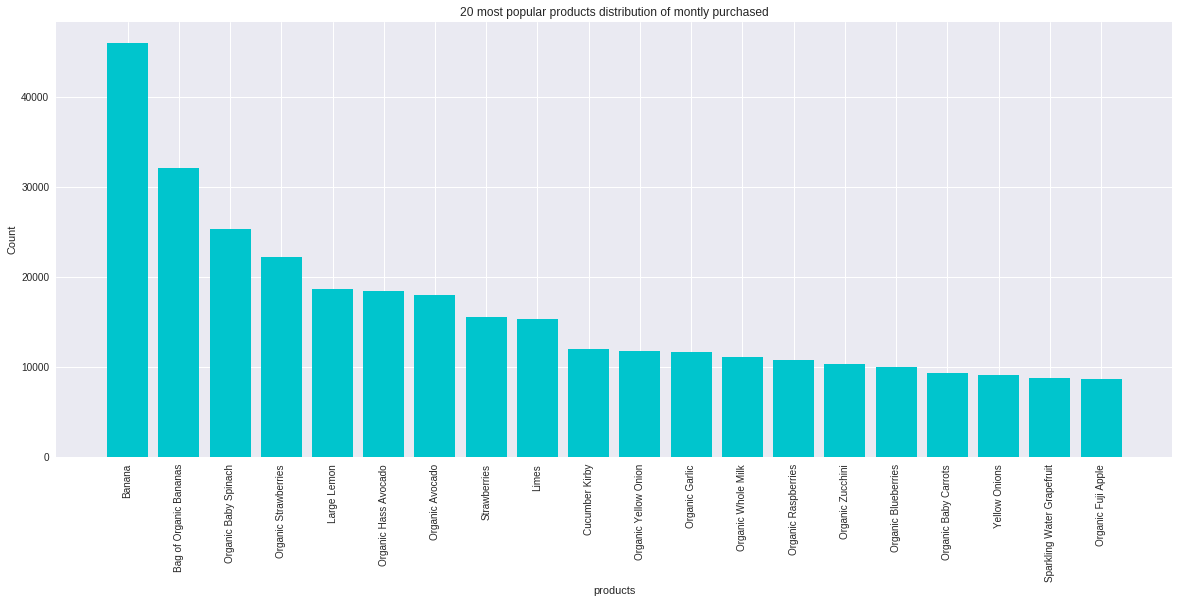

In [21]:
bar_chart(data=selection.loc[df['days_since_prior_order'].isin([30])],
          feature='product_id',
          data_feature=products,
          titles_name=['products','20 most popular products distribution of montly purchased','MontlyProducts.png'])

### Aisles

In [12]:
aisles=pd.read_csv(os.path.join(input_data_path,'aisles.csv'))
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Extrated features:
   aisle_id    count             aisle
0       24  3792661      fresh fruits
1       83  3568630  fresh vegetables
20 most populated items:
 ['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese', 'milk', 'water seltzer sparkling water', 'chips pretzels', 'soy lactosefree', 'bread', 'refrigerated', 'frozen produce', 'ice cream ice', 'crackers', 'energy granola bars', 'eggs', 'lunch meat', 'frozen meals', 'baby food formula', 'fresh herbs']


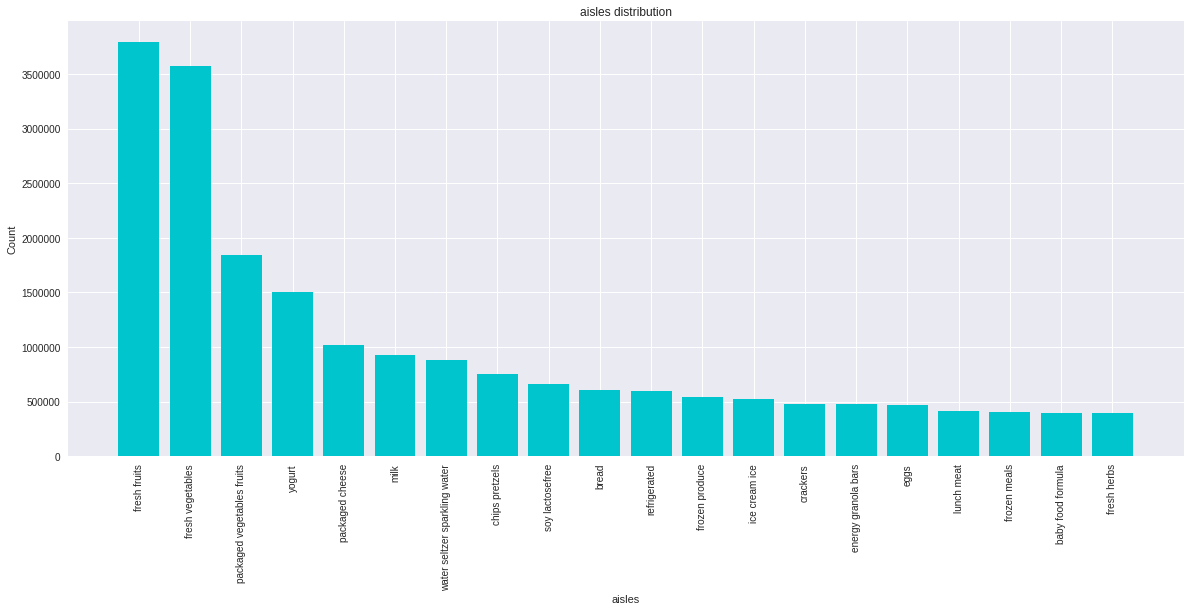

In [13]:
bar_chart(data=df,
          feature='aisle_id',
          data_feature=aisles,
          titles_name=['aisles','aisles distribution','Allaisles_allcustomer.png'])

### Departmens

In [14]:
departments=pd.read_csv(os.path.join(input_data_path,'departments.csv'))
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Extrated features:
   department_id    count  department
0             4  9888378     produce
1            16  5631067  dairy eggs
20 most populated items:
 ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned goods', 'deli', 'dry goods pasta', 'household', 'meat seafood', 'breakfast', 'personal care', 'babies', 'international', 'alcohol', 'pets', 'missing', 'other']


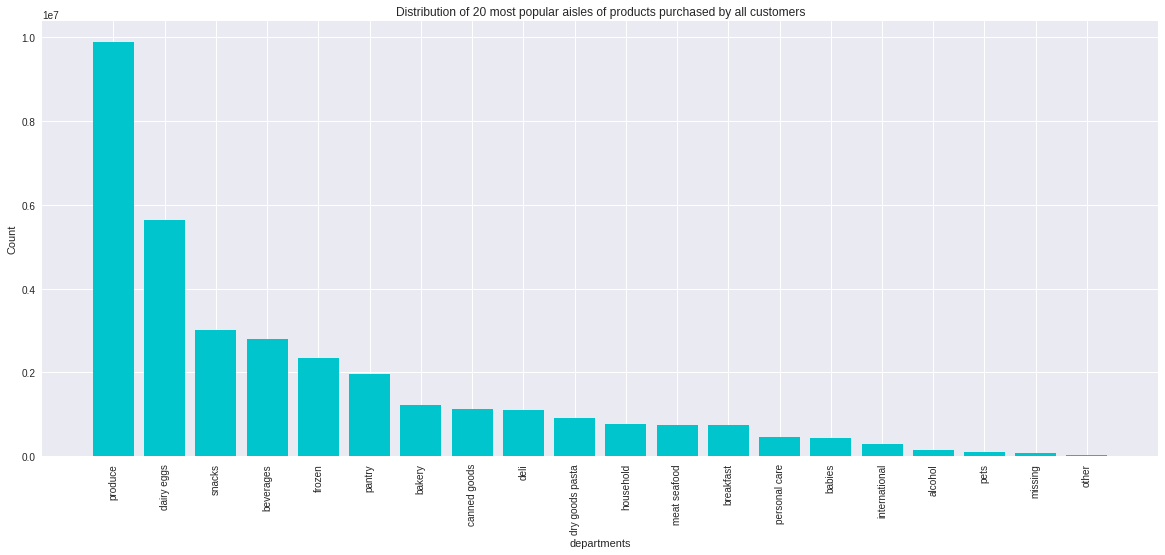

In [16]:
bar_chart(data=df,
          feature='department_id',
          data_feature=departments,
          titles_name=['departments','Distribution of 20 most popular aisles of products purchased by all customers','Alldepartments_allcustomer.png'])

### Differnt frequent product distribution

#### the distribution of the first day costomers

In [12]:
df.loc[df['days_since_prior_order'].isin([-1,7,30])].days_since_prior_order.unique()

array([-1., 30.,  7.])

In [13]:
selection=df.loc[df['days_since_prior_order'].isin([-1,7,30])]
selection.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
0,2539329,1,1,2,8,-1.0,196.0,1.0,0.0,77.0,7.0
1,2539329,1,1,2,8,-1.0,12427.0,3.0,0.0,23.0,19.0
2,2539329,1,1,2,8,-1.0,14084.0,2.0,0.0,91.0,16.0
3,2539329,1,1,2,8,-1.0,26088.0,4.0,0.0,23.0,19.0
4,2539329,1,1,2,8,-1.0,26405.0,5.0,0.0,54.0,17.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


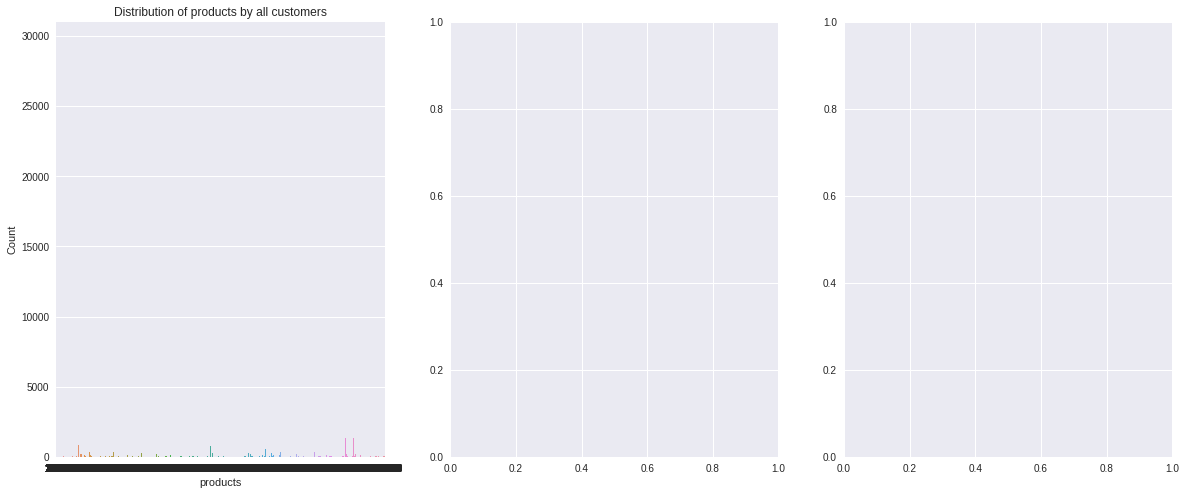

AttributeError: ignored

In [15]:
fig,ax=plt.subplots(3,1,figsize=(20,6))
#
#sns.catplot(x="product_id",col="days_since_prior_order",data=selection, kind="count");
#sns.distplot(df.order_hour_of_day, kde=False,color='#00C5CD')
#bins = np.arange(selection.product_id.nunique())
plt.subplot(3,1, 1)
fig = sns.countplot(x='product_id',data=selection.loc[selection['days_since_prior_order']==-1])
plt.xlabel('products')
#plt.xticks(np.arange(df.days_since_prior_order.nunique()))
plt.ylabel('Count')
plt.title('Distribution of products by all customers')
plt.show()
fig.savefig(os.path.join(output_data_path,'product_frequency.png'))   # save the figure to file
plt.close(fig)

##### Products

In [0]:
dist=pd.DataFrame(data={'count':selection.product_id.value_counts().sort_values(ascending=False)}) \
        .reset_index().rename(columns={"index": "product_id"})\
        .join(products.set_index('product_id'),on='product_id')

In [93]:
dist.head()

,product_id,count,product_name,aisle_id,department_id
0,24852,29534,Banana,24,4
1,13176,19158,Bag of Organic Bananas,24,4
2,21137,16464,Organic Strawberries,24,4
3,47766,15187,Organic Avocado,24,4
4,21903,14948,Organic Baby Spinach,123,4


In [0]:
tick_name=[products.loc[np.where(products.product_id==i)[0],'product_name'].values[0] for i in dist.loc[0:19,'product_id']]

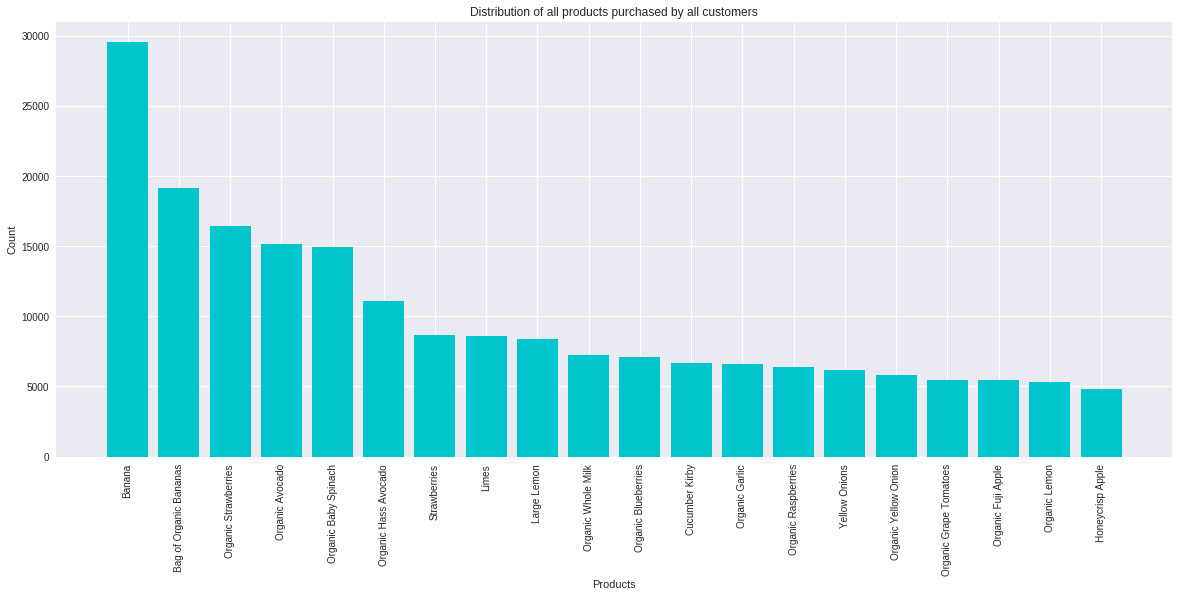

In [95]:
fig=plt.figure(figsize=(20,8))
plt.bar(np.arange(20), dist.loc[0:19,'count'],color='#00C5CD',align='center')
plt.xticks(np.arange(20), tick_name, rotation=90)
plt.xlabel('Products')
plt.ylabel('Count')
plt.title('Distribution of all products purchased by all customers')
plt.show()
fig.savefig(os.path.join(output_data_path,'20products_firstday_Allcustomers.png'))   # save the figure to file
plt.close(fig)

##### Aisles

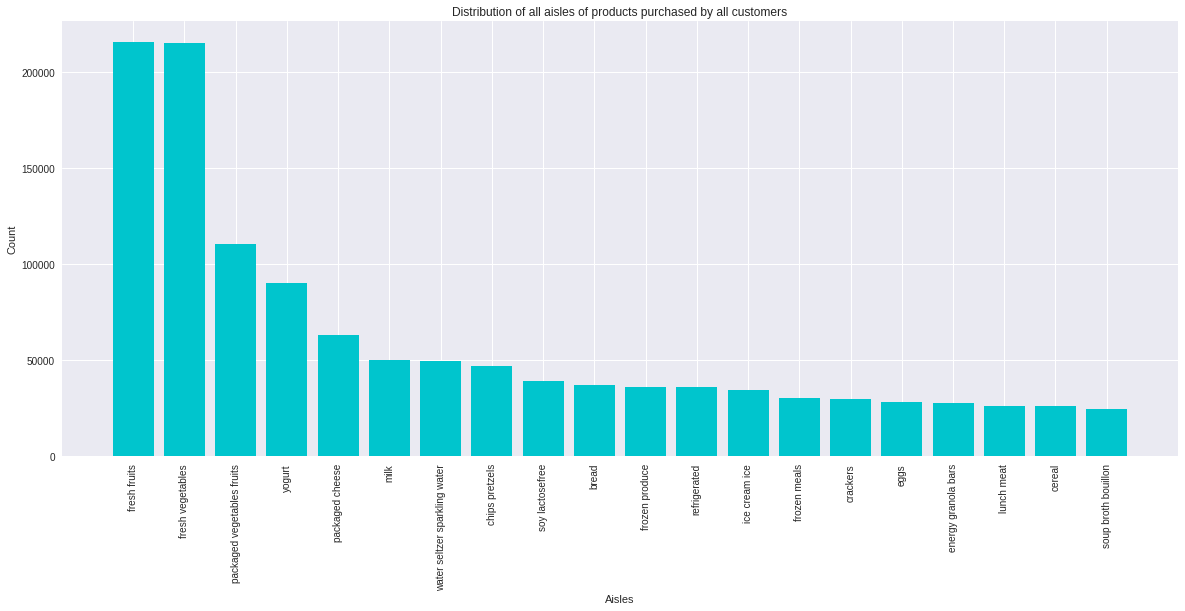

In [97]:
dist=pd.DataFrame(data={'count':grouped.aisle_id.value_counts().sort_values(ascending=False)}) \
        .reset_index().rename(columns={"index": "aisle_id"})\
        .join(aisles.set_index('aisle_id'),on='aisle_id')
tick_name=[aisles.loc[np.where(aisles.aisle_id==i)[0],'aisle'].values[0] for i in dist.loc[0:19,'aisle_id']]
fig=plt.figure(figsize=(20,8))
plt.bar(np.arange(20), dist.loc[0:19,'count'],color='#00C5CD',align='center')
plt.xticks(np.arange(20),tick_name, rotation=90)
plt.xlabel('Aisles')
plt.ylabel('Count')
plt.title('Distribution of all aisles of products purchased by all customers')
plt.show()
fig.savefig(os.path.join(output_data_path,'20aisles_firstday_Allcustomers.png'))   # save the figure to file
plt.close(fig)